In [2]:
!pip install git+https://github.com/tensorlayer/tensorlayerx.git

  Cloning https://github.com/tensorlayer/tensorlayerx.git to /tmp/pip-req-build-z5_v4t24
  Running command git clone --filter=blob:none --quiet https://github.com/tensorlayer/tensorlayerx.git /tmp/pip-req-build-z5_v4t24
  Resolved https://github.com/tensorlayer/tensorlayerx.git to commit c981eb88245da9fd98026b5044d9ad5ee4138e8e
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 3.0 MB/s eta 0:00:00
  Created wheel for tensorlayerx: filename=tensorlayerx-0.5.8-py3-none-any.whl size=530929 sha256=8f9e178a8c1042abb1488e6bfcb1221598efa39e51efabce2720dbe6d7bd24f0
  Stored in directory: /tmp/pip-ephem-wheel-cache-c44c1fdi/wheels/f7/11/ee/86adcc73ee4c67965be13f8b68455990be76d41b9179c2c491
Successfully built tensorlayerx
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!python /content/drive/MyDrive/SRGAN/train.py

2023-08-14 02:09:16.815191: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 02:09:17.896598: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using TensorFlow backend.
/usr/local/lib/python3.10/dist-packages/tensorlayerx/__init__.py:45: UserWarning: The version of the backend you have installed does not match the specified backend version and may not work, please install version tensorflow 2.4.0.
  warnings.warn("The version of the backend you have installed does not match the specified backend version "
2023-08-14 02:09:19.794204: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NU

In [4]:
!python /content/drive/MyDrive/SRGAN/train.py --mode=eval

2023-08-14 07:47:01.539642: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 07:47:02.802038: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using TensorFlow backend.
/usr/local/lib/python3.10/dist-packages/tensorlayerx/__init__.py:45: UserWarning: The version of the backend you have installed does not match the specified backend version and may not work, please install version tensorflow 2.4.0.
  warnings.warn("The version of the backend you have installed does not match the specified backend version "
2023-08-14 07:47:04.797509: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NU

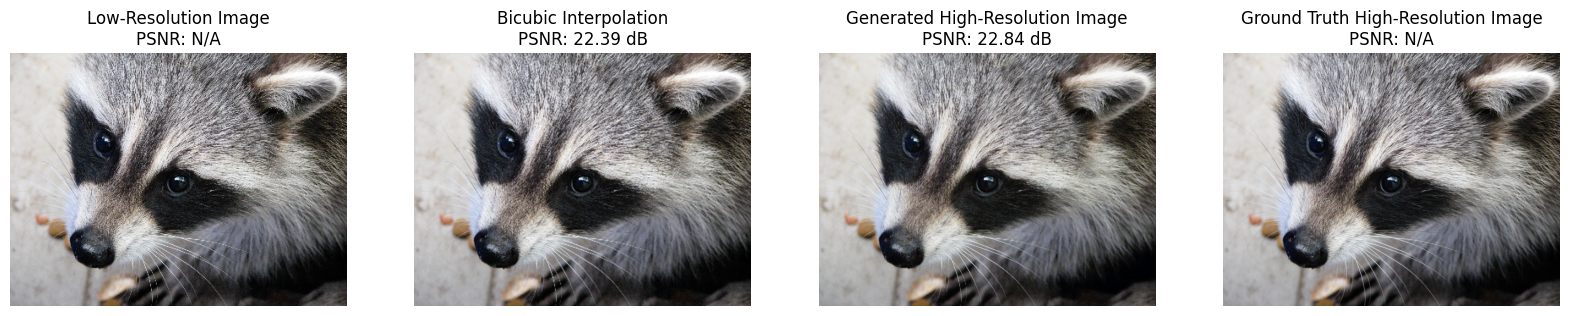

In [5]:
import IPython.display as display
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

image_paths = ['/content/drive/MyDrive/SRGAN/samples/valid_lr.png',
               '/content/drive/MyDrive/SRGAN/samples/valid_hr_cubic.png',
               '/content/drive/MyDrive/SRGAN/samples/valid_gen.png',
               '/content/drive/MyDrive/SRGAN/samples/valid_hr.png']

plt.figure(figsize=(20, 20))

titles = ['Low-Resolution Image', 'Bicubic Interpolation', 'Generated High-Resolution Image', 'Ground Truth High-Resolution Image']

images = [Image.open(image_path) for image_path in image_paths]

hr_img = images[3]

for i, (image, title) in enumerate(zip(images, titles), 1):
    plt.subplot(1, 4, i)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

plt.subplot(1, 4, 1)
plt.title(f"{titles[0]}\nPSNR: N/A")
plt.axis('off')

bicubic_img = images[1]
gen_img = images[2]

# Calculate PSNR values using skimage.metrics.peak_signal_noise_ratio
psnr_bicubic = peak_signal_noise_ratio(np.array(hr_img), np.array(bicubic_img), data_range=255)
psnr_gen = peak_signal_noise_ratio(np.array(hr_img), np.array(gen_img), data_range=255)

# Display PSNR values alongside the corresponding images
plt.subplot(1, 4, 2)
plt.imshow(bicubic_img)
plt.title(f"{titles[1]}\nPSNR: {psnr_bicubic:.2f} dB")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(gen_img)
plt.title(f"{titles[2]}\nPSNR: {psnr_gen:.2f} dB")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(hr_img)
plt.title(f"{titles[3]}\nPSNR: N/A")
plt.axis('off')

plt.show()
